In [ ]:
import numpy as np
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
def system(y, t, l, mu):
  dxdt = [y[1],(l + mu*y[0]**2-y[0]**4)*y[1]-y[0]]
  return dxdt

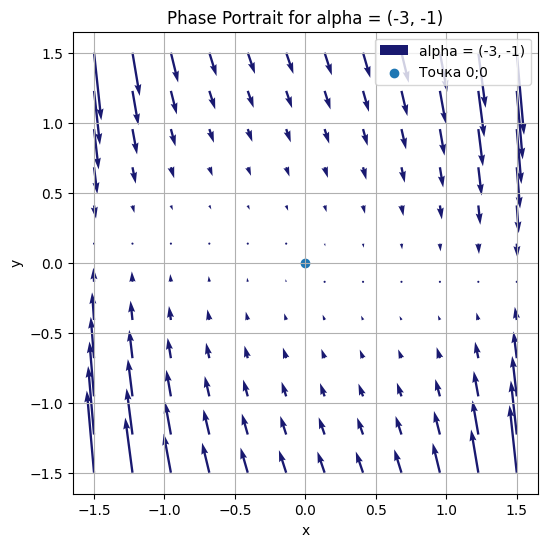

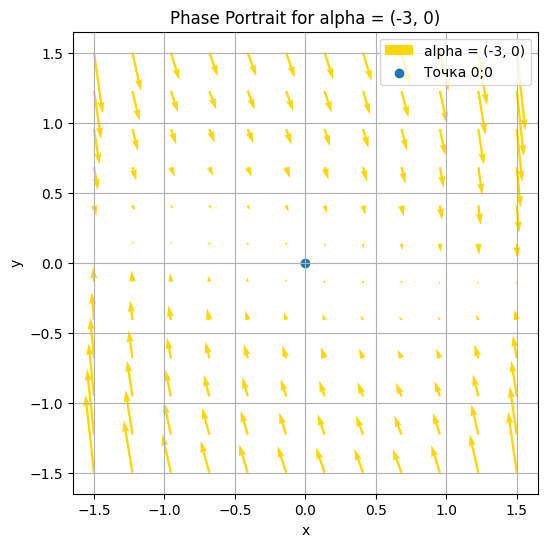

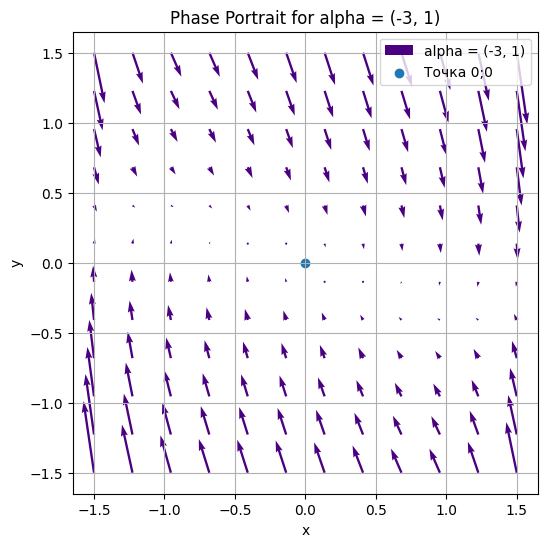

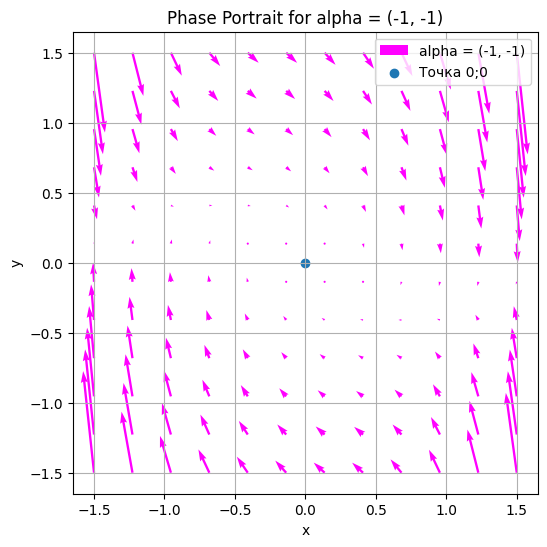

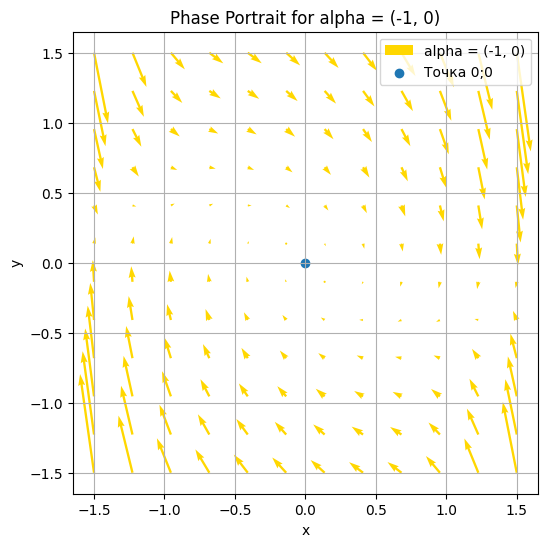

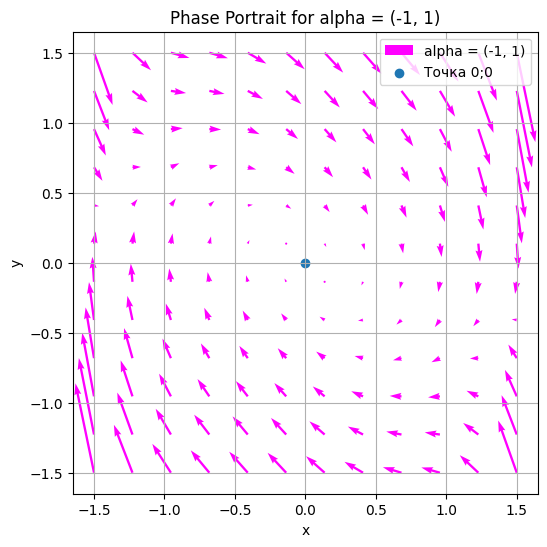

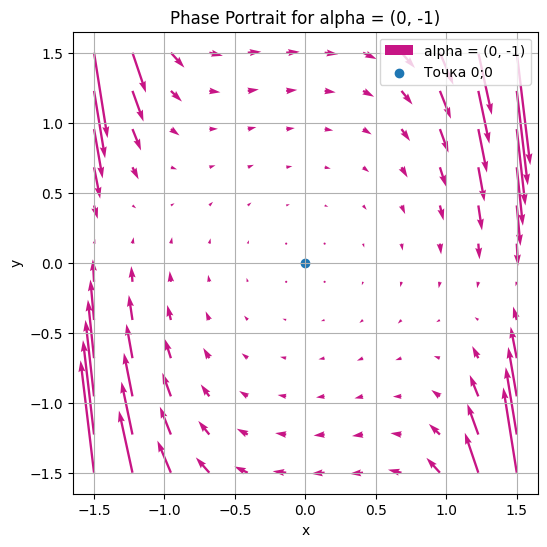

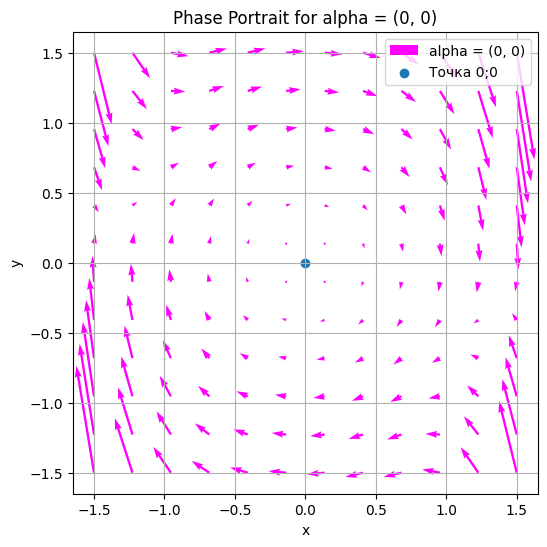

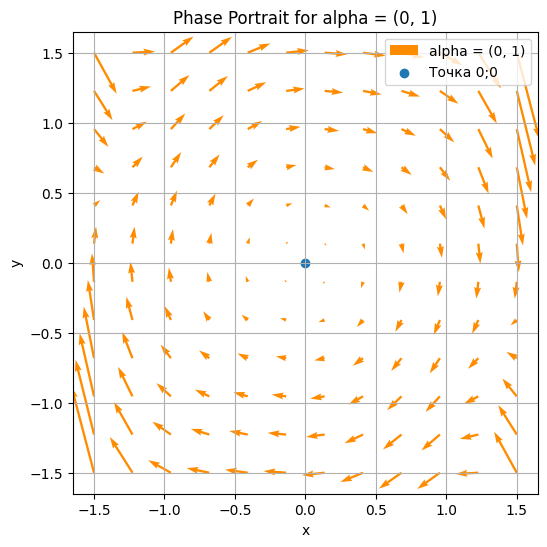

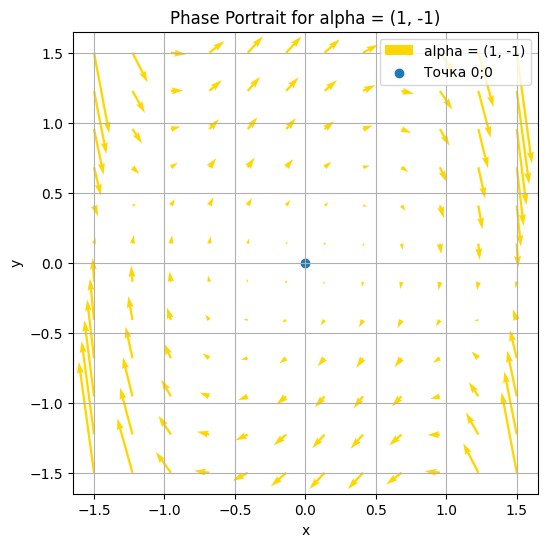

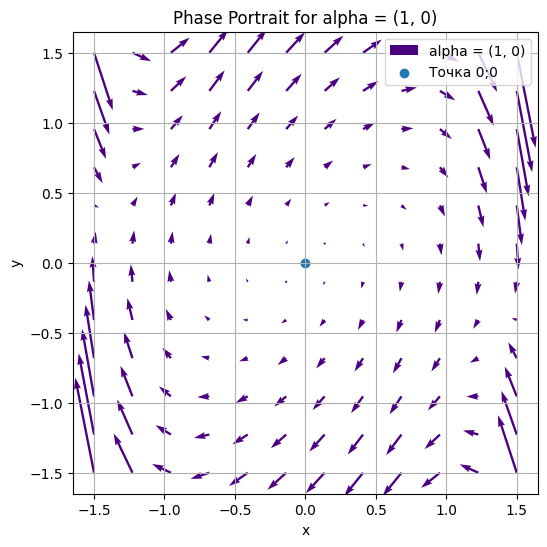

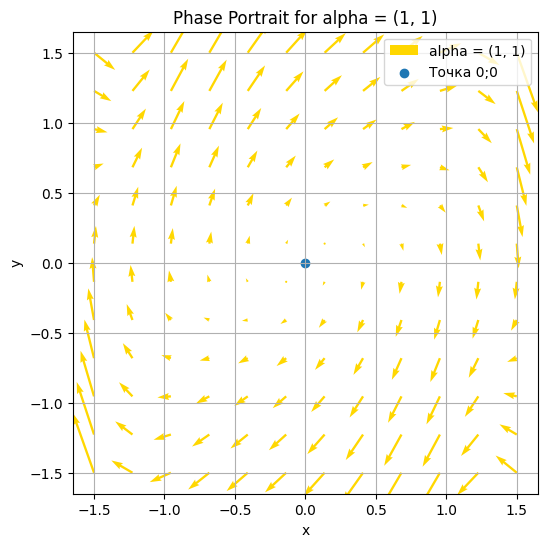

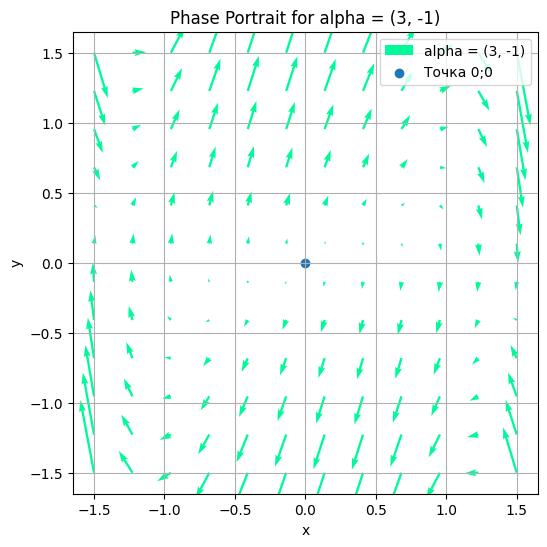

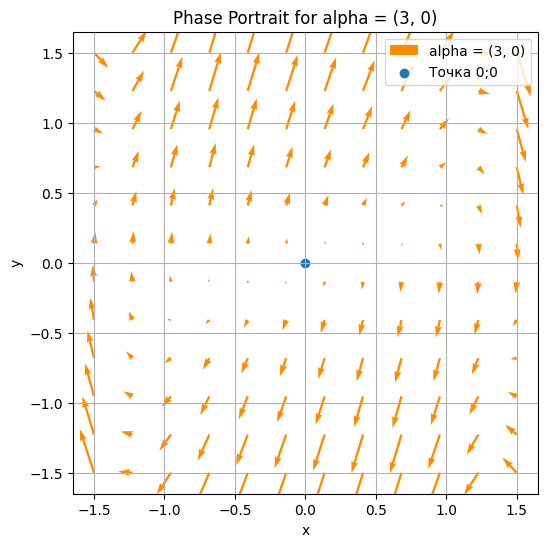

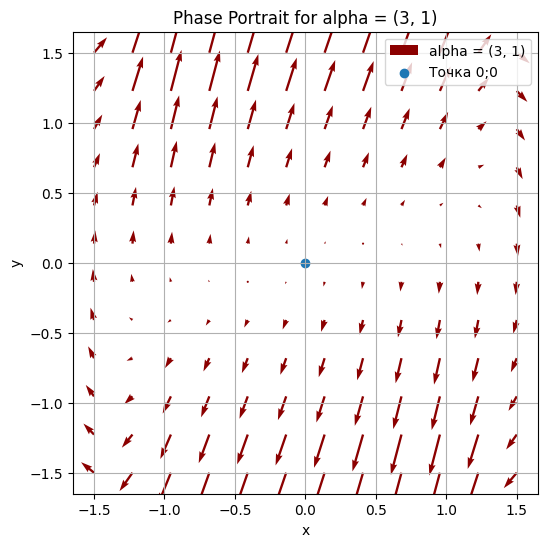

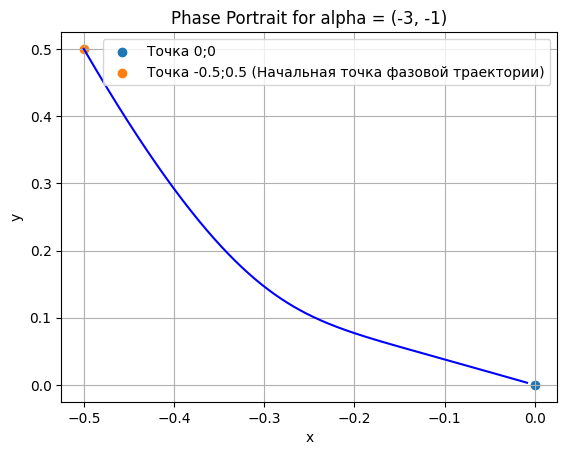

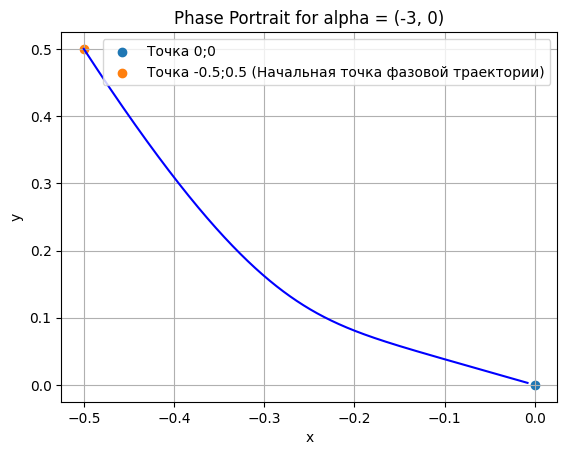

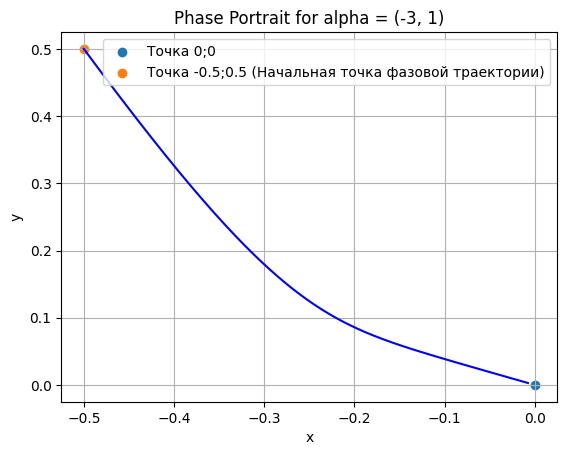

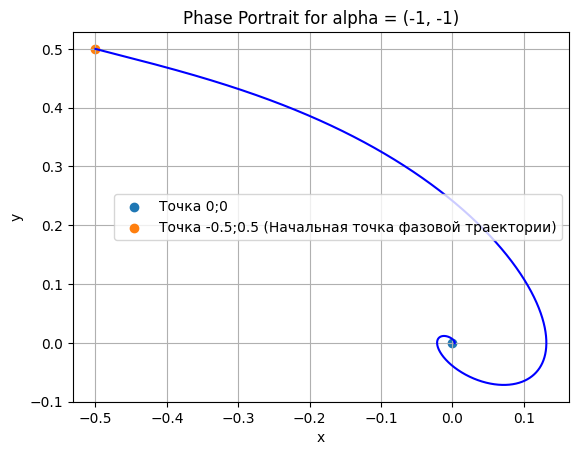

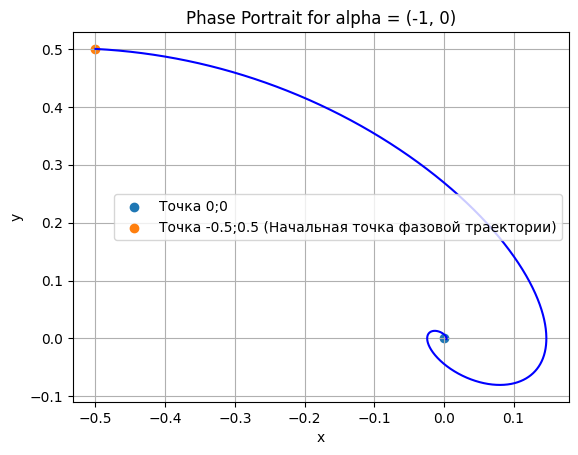

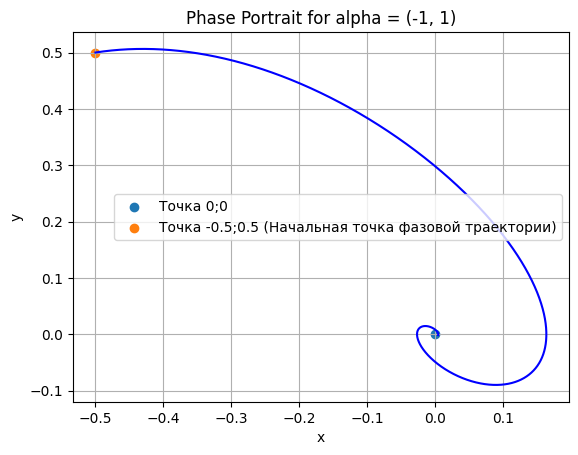

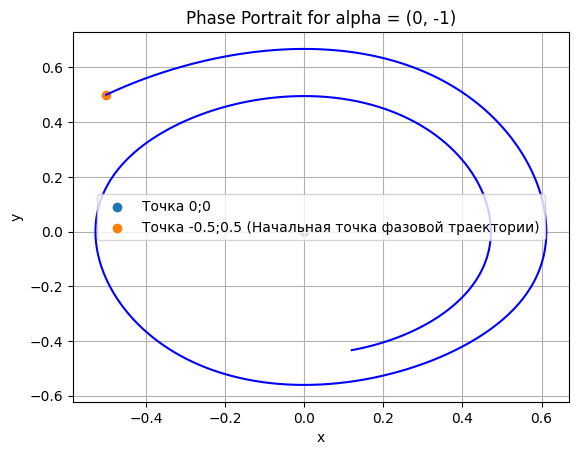

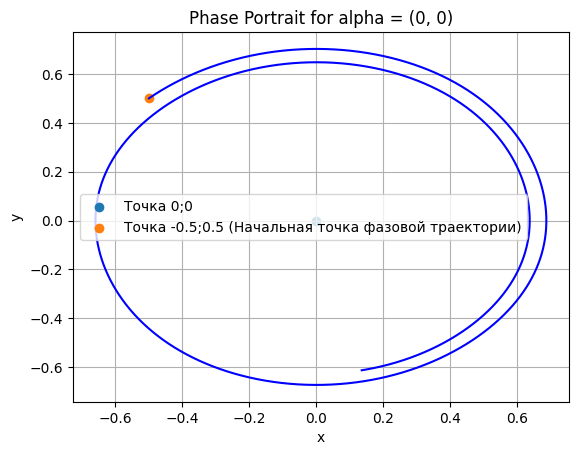

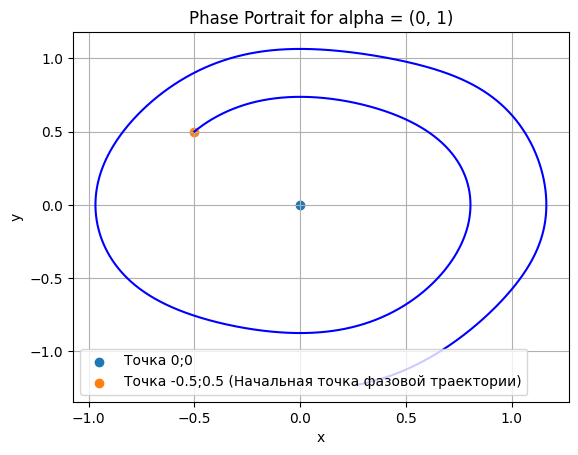

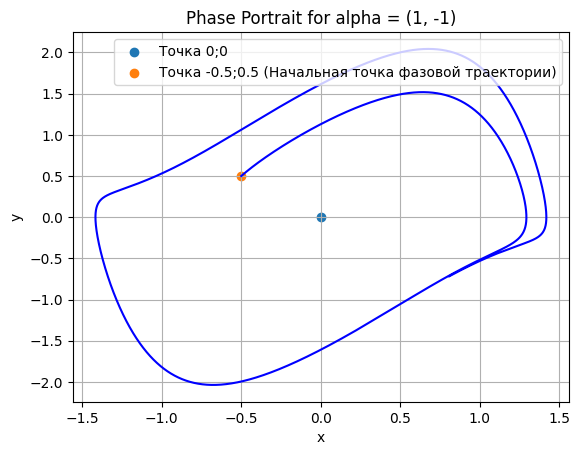

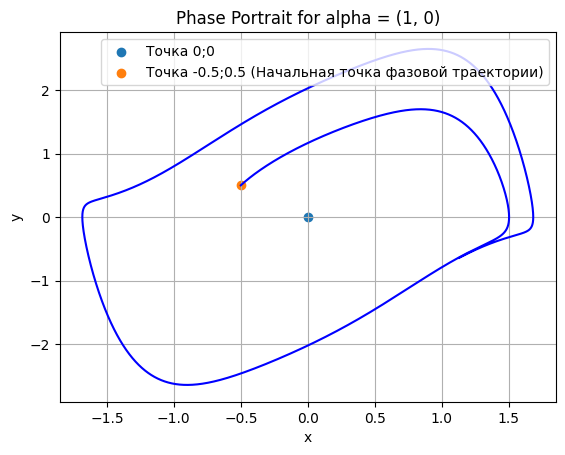

In [ ]:
mu = [-1, 0, 1]
l = [-3, -1, 0, 1, 3]
t = np.linspace(0, 10, 20000)
param_values = list(product(l, mu))
colors = ['#8B0000', '#C71585', '#FF8C00', '#FFD700', '#4B0082', '#FF00FF', \
          '#191970', '#00FA9A']
for i, alpha in enumerate(param_values):
  x0=np.linspace(-1.5,1.5, 12)
  x1=np.linspace(-1.5,1.5, 12)
  X0, X1 = np.meshgrid(x0,x1)
  shape1, shape2 = X1.shape
  dx0 = np.zeros(X0.shape)
  dx1 = np.zeros(X1.shape)
  plt.figure(figsize=(6, 6))
  for indexShape1 in range(shape1):
    for indexShape2 in range(shape2):
      dxdtAtX = system([X0[indexShape1, indexShape2], X1[indexShape1, indexShape2]], 0, alpha[0], alpha[1])
      dx0[indexShape1, indexShape2] = dxdtAtX[0]
      dx1[indexShape1, indexShape2] = dxdtAtX[1]
  plt.quiver(X0, X1, dx0, dx1, label=f'alpha = {alpha}', color=colors[random.randint(0, len(colors)-1)])
  plt.scatter(0, 0, label='Точка 0;0')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Phase Portrait for alpha = {alpha}')
  plt.legend()
  plt.grid(True)
  plt.show()
for i, alpha in enumerate(param_values):
  sol = odeint(system, y0=np.array([-0.5,0.5]), t=t, args=(alpha[0], alpha[1]))
  #plt.xlim(-2,2)
  #plt.ylim(-2,2)
  plt.plot(sol[:, 0], sol[:, 1], 'b')
  plt.scatter(0, 0, label='Точка 0;0')
  plt.scatter(-0.5, 0.5, label='Точка -0.5;0.5 (Начальная точка фазовой траектории)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Phase Portrait for alpha = {alpha}')
  plt.legend()
  plt.grid(True)
  plt.show()